In [1]:
import pandas as pd
import numpy as np
import time_series_transform.base as base
from time_series_transform.time_series_transformer import *
from sklearn.preprocessing import StandardScaler
from time_series_transform.tensorflow_adopter import *
from time_series_transform.stock_transform.base import *

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
df = pd.read_csv('./Data/Stock/sp.csv')
df2 = pd.read_csv('./Data/Stock/GOOGL.csv')

In [3]:
stock1 = Stock('sp500',df)
stock2 = Stock('googl',df2)
port = Portfolio([stock1,stock2])

In [4]:
port.make_technical_indicator('Close','fft10000',rfft_transform,threshold = 10000)
port.make_technical_indicator('Close','fft100',rfft_transform,threshold = 100)
port.make_technical_indicator('Close','fft10',rfft_transform,threshold = 10)

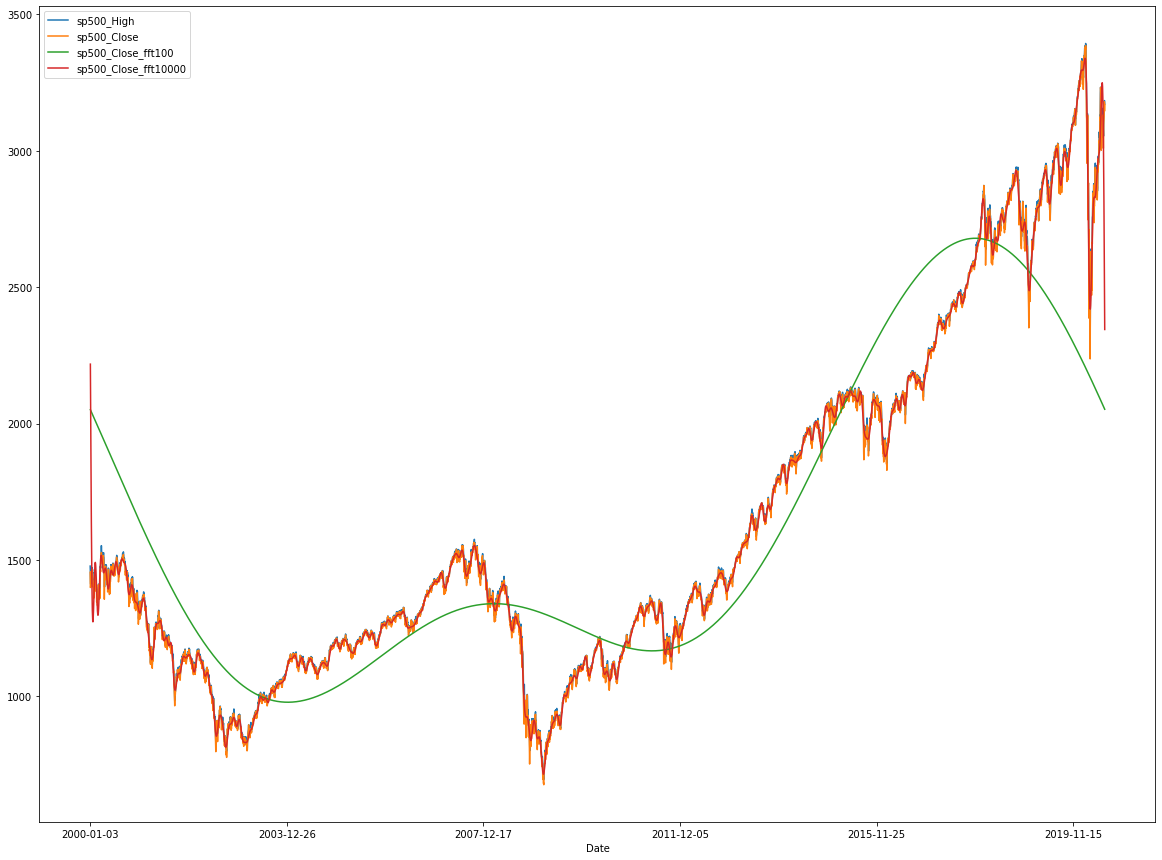

In [12]:
port.plot({
    'sp500':['High','Close','Close_fft100','Close_fft10000']
},'Date',True,figsize=(20,15))

In [5]:
df = port.get_portfolio_dataFrame()

In [59]:
df = df.sort_values('Date',ascending = True)
ix = dict(zip(df.Date.tolist(),list(range(1,len(df.Date)))))
df['ix'] = df.Date.apply(lambda x: ix[x])

,Date,Open,High,Low,Close,Adj Close,Volume,fft10000_Close,fft100_Close,fft10_Close,symbol,ix
0,2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000,NaN,NaN,NaN,sp500,1
1,2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000,2218.142716,2051.167187,1611.196253,sp500,2
2,2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000,2091.772296,2049.554516,1611.196253,sp500,3
3,2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000,1968.396207,2047.941097,1611.196253,sp500,4
4,2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000,1850.325622,2046.326938,1611.196253,sp500,5
...,...,...,...,...,...,...,...,...,...,...,...,...
5158,2020-07-06,3155.290039,3182.590088,3155.290039,3179.719971,3179.719971,4736450000,2591.292319,2056.000645,1611.196253,sp500,6416
5159,2020-07-07,3166.439941,3184.149902,3142.929932,3145.320068,3145.320068,4563700000,2470.266423,2054.390258,1611.196253,sp500,6418
1257,2020-07-07,1496.130005,1521.319946,1489.699951,1489.920044,1489.920044,2118200,1435.656190,1042.114417,1011.343061,googl,6418
1258,2020-07-08,1500.800049,1511.170044,1492.300049,1503.599976,1503.599976,1587500,1184.318019,1039.913725,1011.343061,googl,6419


In [34]:
df = df.pivot('symbol','ix',df.columns.drop(['symbol','ix']))

In [35]:
df.columns = list(map(lambda x: f"{x[0]}_{x[1]}",df.columns))

In [36]:
df

,Open_1,Open_2,Open_3,Open_4,Open_5,Open_6,Open_7,Open_8,Open_9,Open_10,...,fft10_Close_5152,fft10_Close_5153,fft10_Close_5154,fft10_Close_5155,fft10_Close_5156,fft10_Close_5157,fft10_Close_5158,fft10_Close_5159,fft10_Close_5160,fft10_Close_5161
symbol,,,,,,,,,,,,,,,,,,,,,
googl,548.650024,553.710022,559.510010,574.500000,583.739990,589.500000,680.000000,688.979980,684.880005,694.020020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sp500,1469.250000,1455.219971,1399.420044,1402.109985,1403.449951,1441.469971,1457.599976,1438.560059,1432.250000,1449.680054,...,1611.196253,1611.196253,1611.196253,1611.196253,1611.196253,1611.196253,1611.196253,1611.196253,1611.196253,1611.196253


In [18]:
ptspd = Pandas_Time_Series_Panel_Dataset(df)
# ptspd.make_slide_window('Date',2,None,'symbol')

In [16]:
ptspd.make_lead_column('Date','Close',1,'symbol')

            Date         Open         High          Low        Close  \
5160  2020-07-08  3153.070068  3171.800049  3136.530029  3169.939941   
1258  2020-07-08  1500.800049  1511.170044  1492.300049  1503.599976   
1257  2020-07-07  1496.130005  1521.319946  1489.699951  1489.920044   
5159  2020-07-07  3166.439941  3184.149902  3142.929932  3145.320068   
5158  2020-07-06  3155.290039  3182.590088  3155.290039  3179.719971   
...          ...          ...          ...          ...          ...   
4     2000-01-07  1403.449951  1441.469971  1400.729980  1441.469971   
3     2000-01-06  1402.109985  1411.900024  1392.099976  1403.449951   
2     2000-01-05  1399.420044  1413.270020  1377.680054  1402.109985   
1     2000-01-04  1455.219971  1455.219971  1397.430054  1399.420044   
0     2000-01-03  1469.250000  1478.000000  1438.359985  1455.219971   

        Adj Close      Volume                   fft_Close  \
5160  3169.939941  4927700000  1.075842e+06-1.384164e+06j   
1258  1503.59

In [15]:
sp = df[['Date','Close','Close_lead1','symbol']].sort_values(['symbol','Date'],ascending=False)

In [16]:
sp[sp.symbol=='sp500']

,Date,Close,Close_lead1,symbol
5160,2020-07-08,3169.939941,NaN,sp500
5159,2020-07-07,3145.320068,3169.939941,sp500
5158,2020-07-06,3179.719971,3145.320068,sp500
5157,2020-07-02,3130.010010,3179.719971,sp500
5156,2020-07-01,3115.860107,3130.010010,sp500
...,...,...,...,...
4,2000-01-07,1441.469971,1457.599976,sp500
3,2000-01-06,1403.449951,1441.469971,sp500
2,2000-01-05,1402.109985,1403.449951,sp500
1,2000-01-04,1399.420044,1402.109985,sp500


In [19]:
ptspd.expand_dataFrame_by_category('Date','symbol')

             Open_googl   High_googl    Low_googl  Close_googl  \
Date                                                             
2000-01-03          NaN          NaN          NaN          NaN   
2000-01-04          NaN          NaN          NaN          NaN   
2000-01-05          NaN          NaN          NaN          NaN   
2000-01-06          NaN          NaN          NaN          NaN   
2000-01-07          NaN          NaN          NaN          NaN   
...                 ...          ...          ...          ...   
2020-07-01  1419.170044  1448.479980  1414.180054  1442.000000   
2020-07-02  1451.839966  1488.520020  1451.069946  1469.930054   
2020-07-06  1488.150024  1510.000000  1476.979980  1499.650024   
2020-07-07  1496.130005  1521.319946  1489.699951  1489.920044   
2020-07-08  1500.800049  1511.170044  1492.300049  1503.599976   

            Adj Close_googl  Volume_googl              fft_Close_googl  \
Date                                                               

In [20]:
ptspd.make_slide_window('Date',10).make_lead_column('Date','Close_googl',1)

             Open_googl   High_googl    Low_googl  Close_googl  \
Date                                                             
2020-07-08  1500.800049  1511.170044  1492.300049  1503.599976   
2020-07-07  1496.130005  1521.319946  1489.699951  1489.920044   
2020-07-06  1488.150024  1510.000000  1476.979980  1499.650024   
2020-07-02  1451.839966  1488.520020  1451.069946  1469.930054   
2020-07-01  1419.170044  1448.479980  1414.180054  1442.000000   
...                 ...          ...          ...          ...   
2000-01-07          NaN          NaN          NaN          NaN   
2000-01-06          NaN          NaN          NaN          NaN   
2000-01-05          NaN          NaN          NaN          NaN   
2000-01-04          NaN          NaN          NaN          NaN   
2000-01-03          NaN          NaN          NaN          NaN   

            Adj Close_googl  Volume_googl              fft_Close_googl  \
Date                                                               

In [21]:
ptspd.df

,Open_googl,High_googl,Low_googl,Close_googl,Adj Close_googl,Volume_googl,fft_Close_googl,fft_Open_googl,fft_Volume_googl,Open_sp500,...,fft_Volume_sp500_lag2,fft_Volume_sp500_lag3,fft_Volume_sp500_lag4,fft_Volume_sp500_lag5,fft_Volume_sp500_lag6,fft_Volume_sp500_lag7,fft_Volume_sp500_lag8,fft_Volume_sp500_lag9,fft_Volume_sp500_lag10,Close_googl_lead1
Date,,,,,,,,,,,,,,,,,,,,,
2020-07-08,1500.800049,1511.170044,1492.300049,1503.599976,1503.599976,1587500.0,-10748.161451-148139.789924j,-10945.732669-147912.905036j,1.239775e+08+2.151234e+07j,3153.070068,...,-5.401204e+11+2.512636e+11j,3.714791e+11-1.030745e+12j,4.242559e+11-1.955758e+11j,-1.701796e+11-1.008210e+12j,4.482362e+11-2.047702e+11j,-9.981340e+10-3.003119e+11j,4.117844e+11-3.175527e+11j,1.184392e+11-3.583532e+11j,1.955518e+11-4.236041e+11j,NaN
2020-07-07,1496.130005,1521.319946,1489.699951,1489.920044,1489.920044,2118200.0,27332.331921-64882.737914j,27261.716717-64486.273401j,1.701755e+08+1.457000e+08j,3166.439941,...,3.714791e+11-1.030745e+12j,4.242559e+11-1.955758e+11j,-1.701796e+11-1.008210e+12j,4.482362e+11-2.047702e+11j,-9.981340e+10-3.003119e+11j,4.117844e+11-3.175527e+11j,1.184392e+11-3.583532e+11j,1.955518e+11-4.236041e+11j,1.857844e+11-1.448915e+11j,1503.599976
2020-07-06,1488.150024,1510.000000,1476.979980,1499.650024,1499.650024,2235600.0,-3079.948442-56708.928408j,-3000.153330-56637.005763j,1.046143e+08-3.893710e+06j,3155.290039,...,4.242559e+11-1.955758e+11j,-1.701796e+11-1.008210e+12j,4.482362e+11-2.047702e+11j,-9.981340e+10-3.003119e+11j,4.117844e+11-3.175527e+11j,1.184392e+11-3.583532e+11j,1.955518e+11-4.236041e+11j,1.857844e+11-1.448915e+11j,2.494318e+09-5.036795e+11j,1489.920044
2020-07-02,1451.839966,1488.520020,1451.069946,1469.930054,1469.930054,2860900.0,-11769.673203-33665.572525j,-11914.161551-33503.313201j,2.254976e+07-1.238244e+07j,3143.639893,...,-1.701796e+11-1.008210e+12j,4.482362e+11-2.047702e+11j,-9.981340e+10-3.003119e+11j,4.117844e+11-3.175527e+11j,1.184392e+11-3.583532e+11j,1.955518e+11-4.236041e+11j,1.857844e+11-1.448915e+11j,2.494318e+09-5.036795e+11j,4.124154e+11-1.849365e+11j,1499.650024
2020-07-01,1419.170044,1448.479980,1414.180054,1442.000000,1442.000000,2109100.0,-3686.011063-25471.244608j,-3782.881810-25211.974551j,-3.865580e+07-9.461943e+07j,3105.919922,...,4.482362e+11-2.047702e+11j,-9.981340e+10-3.003119e+11j,4.117844e+11-3.175527e+11j,1.184392e+11-3.583532e+11j,1.955518e+11-4.236041e+11j,1.857844e+11-1.448915e+11j,2.494318e+09-5.036795e+11j,4.124154e+11-1.849365e+11j,-3.483044e+10-5.649171e+11j,1469.930054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1403.449951,...,1.635839e+12+2.006339e+12j,-2.608224e+12+2.233216e+12j,1.626129e+13-0.000000e+00j,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1402.109985,...,-2.608224e+12+2.233216e+12j,1.626129e+13-0.000000e+00j,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1399.420044,...,1.626129e+13-0.000000e+00j,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
!pip install pandas --update


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: --update
